## Read data

### Read libraries

In [6]:
from src.data_preprocessing import drop_empty_cols_and_rows, drop_columns

### Read data

In [7]:
import pandas as pd

big_KOI_data = True
if big_KOI_data:
    path = "datasets/KOI_2025.10.03_07.23.34.csv"
    skiprow_nr = 144
else:    
    path = 'datasets/KOI_cumulative.csv'
    skiprow_nr = 53

df_orig = pd.read_csv(path, skiprows=skiprow_nr)
df_orig.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


## Clean data

In [8]:
df = drop_empty_cols_and_rows(df_orig)

Original shape: (9564, 141)
After dropping all-empty columns: (9564, 122)
After dropping all-empty rows: (9564, 122)


#### Remove specified columns

In [9]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [10]:
df = drop_columns(df, big_KOI_data)

#### Filtered on Confirmed and X

In [11]:
label_A = "CONFIRMED"
label_B = "CANDIDATE"
# Step 1: Filter out FP
df_rem_filtered = df[df['koi_disposition'].isin([label_A, label_B])].copy()

if label_B=="FALSE POSITIVE":
    # remove all columns with false positive flags (flg somewhere in column name)
    fp_cols = [col for col in df_rem_filtered.columns if "fpflag" in col.lower()]
    if fp_cols:
        df_rem_filtered = df_rem_filtered.drop(columns=fp_cols)
        print(f"Dropped fpflag columns: {fp_cols}")

print("Remaining dispositions:\n", df_rem_filtered['koi_disposition'].value_counts())

Remaining dispositions:
 koi_disposition
CONFIRMED    2746
CANDIDATE    1979
Name: count, dtype: int64


In [12]:
df_rem_filtered.head()

,koi_disposition,koi_vet_stat,koi_vet_date,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,...,0.200,0.16,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,...,0.000,0.48,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,CANDIDATE,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,...,-0.034,0.07,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
4,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,2.525592,...,-0.090,0.18,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200
5,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,11.094321,...,-0.070,0.11,0.080,0.130,-0.020,0.130,-0.080,0.100,0.080,0.100


In [13]:
from sklearn.preprocessing import LabelEncoder

df_binary = df_rem_filtered.copy()
le = LabelEncoder()
df_binary['label'] = le.fit_transform(df_binary['koi_disposition'])


In [14]:
# Select only numeric features
numeric_cols = df_binary.select_dtypes(include=['int64','float64']).columns

# Correlation matrix with the label
correlations = df_binary[numeric_cols].corrwith(df_binary['label']).sort_values(key=abs, ascending=False)
print("Top correlations with koi_disposition:\n", correlations)


Top correlations with koi_disposition:
 label                1.000000
koi_fwm_sdeco_err   -0.547956
koi_fwm_sdec_err    -0.547860
koi_fwm_srao_err    -0.547552
koi_fwm_sra_err     -0.541306
                       ...   
koi_fpflag_co             NaN
koi_fpflag_ec             NaN
koi_eccen                 NaN
koi_ldm_coeff4            NaN
koi_ldm_coeff3            NaN
Length: 103, dtype: float64


c:\Projects\NASA Space App Challenge - XOXOplanet\xoxoplanet-nasa2025\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Projects\NASA Space App Challenge - XOXOplanet\xoxoplanet-nasa2025\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [15]:
correlations

label                1.000000
koi_fwm_sdeco_err   -0.547956
koi_fwm_sdec_err    -0.547860
koi_fwm_srao_err    -0.547552
koi_fwm_sra_err     -0.541306
                       ...   
koi_fpflag_co             NaN
koi_fpflag_ec             NaN
koi_eccen                 NaN
koi_ldm_coeff4            NaN
koi_ldm_coeff3            NaN
Length: 103, dtype: float64

## EAD

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_EAD(df):
    # --- 1. Basic info ---
    print("Shape of dataset:", df.shape)
    print("Columns available:", df.columns.tolist()[:20], "...")  # show first 20 cols
    print("\nDisposition value counts:\n", df['koi_disposition'].value_counts())

    # --- 2. Label balance (planet vs false positive vs candidate) ---
    plt.figure(figsize=(6,4))
    sns.countplot(x="koi_disposition", data=df, order=df['koi_disposition'].value_counts().index)
    plt.title("Exoplanet Candidate Dispositions")
    plt.ylabel("Count")
    plt.xlabel("Disposition")
    plt.xticks(rotation=20)
    plt.show()

    # --- 3. Key distributions (period, depth, signal-to-noise ratio) ---
    # koi_period = orbital period (days)
    # koi_depth = transit depth (ppm)
    # koi_model_snr = model signal-to-noise ratio
    features = ['koi_period', 'koi_depth', 'koi_model_snr']
    titles = ['Orbital Period (days)', 'Transit Depth (ppm)', 'Signal-to-Noise Ratio']

    plt.figure(figsize=(15,4))
    for i, (feat, title) in enumerate(zip(features, titles)):
        plt.subplot(1,3,i+1)
        sns.histplot(df[feat].dropna(), bins=50, kde=False)
        plt.xlabel(title)
        plt.ylabel("Count")
        plt.yscale("log")  # log scale helps with skewed distributions
    plt.suptitle("Distribution of Key Features")
    plt.tight_layout()
    plt.show()

    # --- 4. Compare distributions by disposition ---
    plt.figure(figsize=(12,4))
    sns.boxplot(x="koi_disposition", y="koi_model_snr", data=df)
    plt.title("Signal-to-Noise by Disposition")
    plt.yscale("log")
    plt.show()

    plt.figure(figsize=(12,4))
    sns.boxplot(x="koi_disposition", y="koi_depth", data=df)
    plt.title("Transit Depth by Disposition")
    plt.yscale("log")
    plt.show()

    if label_B != "FALSE POSITIVE":
        # --- 5. Noise patterns exploration ---
        # Flag columns indicate potential false positives
        fp_flags = ['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec']

        for col in fp_flags:
            if col in df.columns:
                print(f"\n{col} value counts:\n", df[col].value_counts())

        plt.figure(figsize=(8,5))
        sns.heatmap(df[fp_flags].corr(), annot=True, cmap="coolwarm")
        plt.title("Correlation of False Positive Flags")
        plt.show()


Shape of dataset: (4725, 116)
Columns available: ['koi_disposition', 'koi_vet_stat', 'koi_vet_date', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1', 'koi_time0_err2', 'koi_eccen', 'koi_impact'] ...

Disposition value counts:
 koi_disposition
CONFIRMED    2746
CANDIDATE    1979
Name: count, dtype: int64


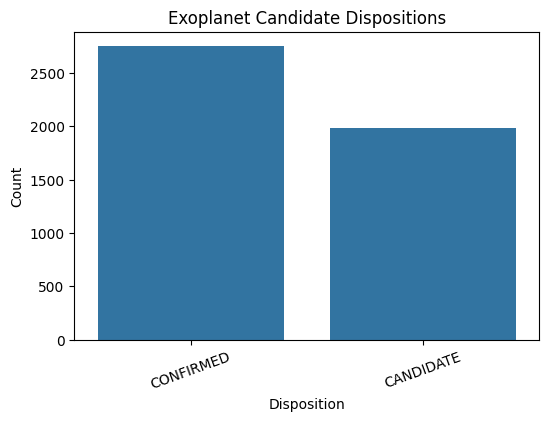

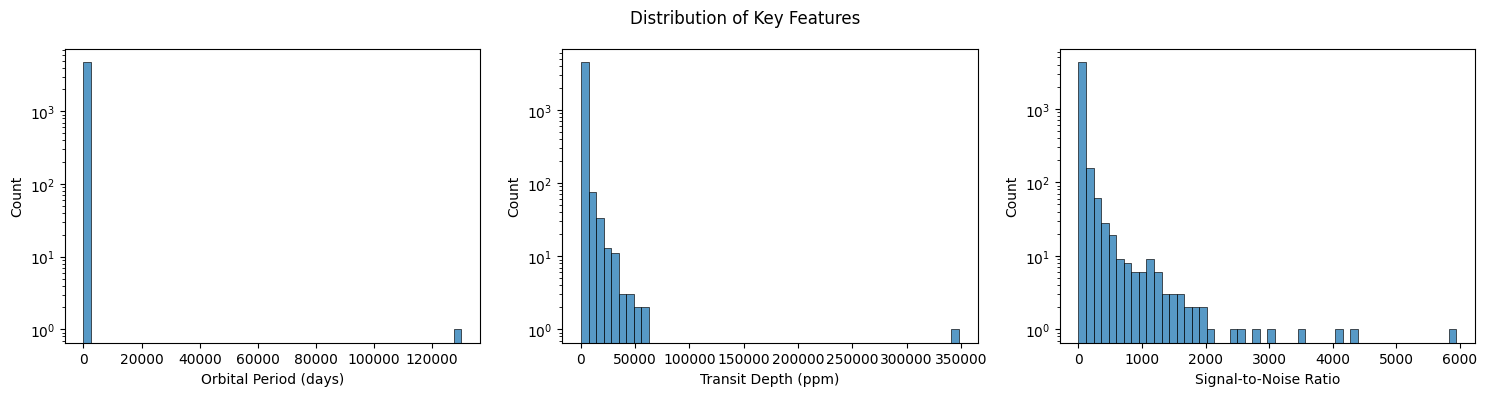

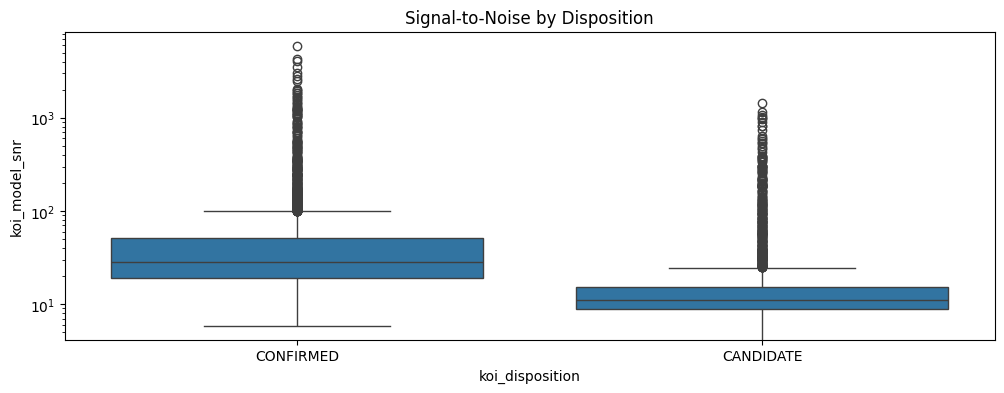

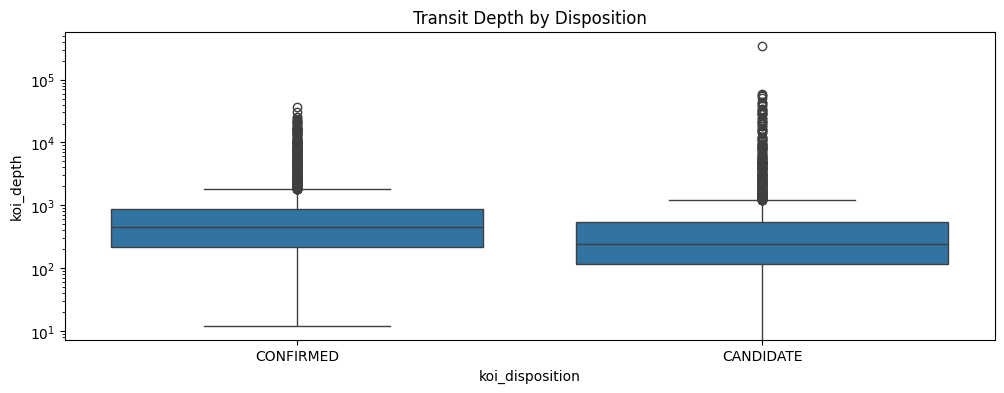


koi_fpflag_nt value counts:
 koi_fpflag_nt
0      4720
1         4
465       1
Name: count, dtype: int64

koi_fpflag_ss value counts:
 koi_fpflag_ss
0    4709
1      16
Name: count, dtype: int64

koi_fpflag_co value counts:
 koi_fpflag_co
0    4725
Name: count, dtype: int64

koi_fpflag_ec value counts:
 koi_fpflag_ec
0    4725
Name: count, dtype: int64


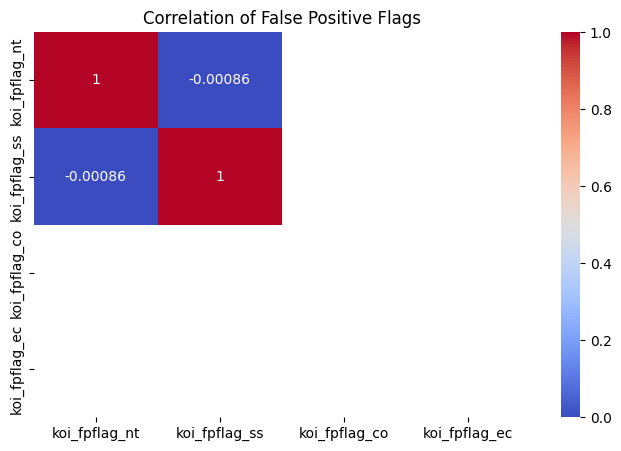

In [17]:
plot_EAD(df_binary)

In [18]:


# # Step 2: Identify problematic columns
# # Columns where all CONFIRMED are missing OR all FALSE POSITIVE are missing
# confirmed = df_filtered[df_filtered['koi_disposition'] == 'CONFIRMED']
# false_pos = df_filtered[df_filtered['koi_disposition'] == 'FALSE POSITIVE']

# problematic_cols = []
# for col in df_filtered.columns:
#     if col == 'koi_disposition':  # skip label column
#         continue
#     # Check if all values missing in one class
#     if confirmed[col].isna().all() or false_pos[col].isna().all():
#         problematic_cols.append(col)

# print("\nColumns with missing values in one class only (to drop):")
# print(problematic_cols)

# # Step 3: Drop those columns
# df_clean = df_filtered.drop(columns=problematic_cols)

# print("\nFinal shape after cleaning:", df_clean.shape)

## Feature engineering: finding the relevant columns and creating new if needed

In [19]:
df_binary.head()

,koi_disposition,koi_vet_stat,koi_vet_date,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,label
0,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,...,0.16,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,1
1,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,...,0.48,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,1
2,CANDIDATE,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,...,0.07,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,0
4,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,2.525592,...,0.18,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200,1
5,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,11.094321,...,0.11,0.080,0.130,-0.020,0.130,-0.080,0.100,0.080,0.100,1


### Missing value impute

In [20]:
import pandas as pd

def remove_rows_over_50_missing(df):
    """
    Removes rows with more than 50% missing values.

    Parameters:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with rows >50% missing removed.
    """
    # Compute fraction of missing per row
    row_missing_frac = df.isnull().mean(axis=1)
    
    # Rows with more than 50% missing
    rows_over_50 = row_missing_frac[row_missing_frac > 0.5].index.tolist()
    
    print(f"Number of rows with >50% missing: {len(rows_over_50)}")
    print("Indices of rows with >50% missing:")
    print(rows_over_50)
    
    # Remove those rows
    df_cleaned = df.drop(index=rows_over_50)
    print(f"Shape before: {df.shape}, Shape after removal: {df_cleaned.shape}")
    
    return df_cleaned


In [21]:
# qualitivate feature engineering
# # Need to understand if to include error. the relative change between error and magnitude/value
# columns_to_keep = ["koi_disposition", # y
#                    "koi_vet_stat",
#                    "koi_period",
#                    "koi_period_err1",
#                    "koi_eccen",
#                    "koi_eccen_err1",
#                    "koi_longp",
#                    "koi_longp_err1",
#                    "koi_impact",
#                    "koi_impact_err1",
#                    "koi_duration",
#                    "koi_duration_err1",
#                    "koi_depth",
#                    "koi_depth_err1",
#                    "koi_ror",
#                    "koi_ror_err1",
#                    "koi_srho",
#                    "koi_srho_err1",
#                    "koi_prad",
#                    "koi_prad_err1",
#                    "koi_sma",
#                    "koi_sma_err1",
#                    "koi_incl",
#                    "koi_incl_err1",
#                    "koi_teq",
#                    "koi_teq_err1",
#                    "koi_inso",
#                    "koi_inso_err1",
#                    "koi_dor",
#                    "koi_dor_err1",


In [22]:

#                    ]
import pandas as pd
import numpy as np

def clean_and_impute(df, target_col="label"):
    """
    - Keeps the target column untouched.
    - For numeric columns: imputes missing values with column mean.
    - For non-numeric columns: drops them.
    
    Parameters:
        df (pd.DataFrame): Input dataframe
        target_col (str): Name of target/label column to preserve
        
    Returns:
        pd.DataFrame: Cleaned dataframe
    """
    df_cleaned = df.copy()



    # Iterate over columns
    for col in df.columns:
        if col == target_col:
            continue  # skip label column

        if pd.api.types.is_numeric_dtype(df[col]):
            if df[col].isnull().any():
                df_cleaned[col] = df[col].fillna(df[col].mean())
        else:
            df_cleaned = df_cleaned.drop(columns=[col])
            print(f"Dropped non-numeric column: {col}")

    return df_cleaned


from sklearn.model_selection import train_test_split
def split_X_y(df):
    """
    Splits a DataFrame into features X and target y.
    
    Parameters:
        df (pd.DataFrame): The full dataset with features and target.
    
    Returns:
        X (pd.DataFrame): Feature columns.
        y (pd.Series): Target column.
    """
    # print("koi_disposition" in df.columns)
    if "koi_disposition" in df.columns:
        df = df.drop(columns="koi_disposition")
        # print("columns dropped")
        # print("koi_disposition" in df.columns)

    df = clean_and_impute(df)
    print("df size: ", df.size)
    y = df["label"]          # target column
    X = df.drop(columns="label")
    return X, y




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def split_train_val_test_scale(X, y, train_ratio=0.7, random_seed=42):
    """
    Splits features X and target y into train/validation/test sets and scales numeric features with MinMaxScaler.
    Non-numeric columns are automatically removed.

    Parameters:
        X (pd.DataFrame or np.array): Features.
        y (pd.Series or np.array): Target.
        train_ratio (float): Proportion of data for training (default 0.7).
        random_seed (int): Random seed for reproducibility (default 42).

    Returns:
        X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler
    """
    # Keep only numeric columns
    numeric_cols = X.select_dtypes(include=["number"]).columns
    non_numeric_cols = [col for col in X.columns if col not in numeric_cols]
    if non_numeric_cols:
        print(f"Warning: Non-numeric columns removed before scaling: {non_numeric_cols}")
    X_numeric = X[numeric_cols]

    # First split: train vs (val+test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_numeric, y, train_size=train_ratio, random_state=random_seed, stratify=y
    )

    # Second split: validation vs test (50/50 of the remaining data)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, train_size=0.5, random_state=random_seed, stratify=y_temp
    )

    # Scale features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler

# Example usage:

# Example usage:
df_binary_cleaned = remove_rows_over_50_missing(df_binary)
display(df_binary_cleaned.head())
X, y = split_X_y(df_binary_cleaned)
X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler = split_train_val_test_scale(X, y)


Number of rows with >50% missing: 84
Indices of rows with >50% missing:
[479, 746, 822, 970, 1101, 1242, 1502, 1602, 1673, 1889, 1890, 1923, 1934, 2018, 2210, 5929, 6109, 6116, 6192, 6316, 6348, 6467, 6514, 6516, 6529, 6566, 6570, 6581, 6615, 6623, 6650, 6675, 6680, 6686, 6768, 6799, 6800, 6811, 6862, 6901, 6984, 7012, 7013, 7045, 7056, 7066, 7068, 7071, 7075, 7076, 7086, 7091, 7095, 7106, 7127, 7132, 7150, 7160, 7177, 7190, 7191, 7204, 7222, 7280, 7327, 7335, 7346, 7366, 7367, 7368, 7395, 7450, 7452, 7460, 7461, 7463, 7484, 7488, 7499, 7603, 7614, 8803, 9004, 9152]
Shape before: (4725, 116), Shape after removal: (4641, 116)


,koi_disposition,koi_vet_stat,koi_vet_date,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,label
0,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,...,0.16,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,1
1,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,...,0.48,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,1
2,CANDIDATE,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,...,0.07,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,0
4,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,2.525592,...,0.18,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200,1
5,CONFIRMED,Done,2018-08-16,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,11.094321,...,0.11,0.080,0.130,-0.020,0.130,-0.080,0.100,0.080,0.100,1


Dropped non-numeric column: koi_vet_stat
Dropped non-numeric column: koi_vet_date
Dropped non-numeric column: koi_disp_prov
Dropped non-numeric column: koi_comment
Dropped non-numeric column: koi_fittype
Dropped non-numeric column: koi_limbdark_mod
Dropped non-numeric column: koi_parm_prov
Dropped non-numeric column: koi_quarters
Dropped non-numeric column: koi_trans_mod
Dropped non-numeric column: koi_datalink_dvr
Dropped non-numeric column: koi_datalink_dvs
Dropped non-numeric column: koi_sparprov
df size:  478023


## Model

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier  # make sure xgboost is installed
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score,
    f1_score, accuracy_score, confusion_matrix
)

def train_random_forest(X_train, y_train, **kwargs):
    """Train a Random Forest classifier."""
    rf = RandomForestClassifier(random_state=42, **kwargs)
    rf.fit(X_train, y_train)
    return rf

def train_gradient_boosting(X_train, y_train, **kwargs):
    """Train a Gradient Boosting classifier."""
    gb = GradientBoostingClassifier(random_state=42, **kwargs)
    gb.fit(X_train, y_train)
    return gb

def train_xgboost(X_train, y_train, **kwargs):
    """Train an XGBoost classifier."""
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **kwargs)
    xgb.fit(X_train, y_train)
    return xgb

def train_adaboost(X_train, y_train, **kwargs):
    """
    Train an AdaBoost classifier.
    Returns:
        AdaBoostClassifier: Trained AdaBoost model
    """
    ada = AdaBoostClassifier(
        random_state=42, 
        **kwargs
    )
    
    ada.fit(X_train, y_train)
    return ada

In [27]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import pandas as pd

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluates a classification model and returns metrics in a dictionary.
    Also prints a summary.
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    # Print summary
    print(f"==== {model_name} Evaluation ====")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    if auc is not None:
        print(f"ROC-AUC  : {auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("==========================")

    return {
        "model": model_name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": auc
    }


def compare_models(results):
    """
    Takes a list of results dictionaries and visualizes metrics.
    """
    df_results = pd.DataFrame(results)

    # Melt dataframe for plotting
    df_melted = df_results.melt(id_vars="model", var_name="metric", value_name="score")
    df_melted = df_melted[df_melted["metric"] != "roc_auc"]  # exclude AUC from barplot (better in ROC plot)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_melted, x="metric", y="score", hue="model")
    plt.title("Model Comparison (Accuracy, Precision, Recall, F1)")
    plt.ylim(0, 1)
    plt.legend(title="Model")
    plt.show()


def plot_roc_curves(models, X_test, y_test, theme="dark"):
    """
    Plots ROC curves for multiple models in a modern, streamlit-style look.
    
    Parameters:
        models (dict): { "ModelName": trained_model }
        X_test (np.array): Test features
        y_test (np.array): Test labels
        theme (str): "dark" (default) or "light"
    """
    # Streamlit-like colors
    palette = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
    ]
    
    if theme == "dark":
        plt.style.use("dark_background")
        bg_color = "#0E1117"
        grid_color = "#30343F"
    else:
        plt.style.use("seaborn-v0_8-whitegrid")
        bg_color = "#ffffff"
        grid_color = "#e5e5e5"

    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.set_facecolor(bg_color)

    for i, (model_name, model) in enumerate(models.items()):
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            auc = roc_auc_score(y_test, y_proba)
            plt.plot(
                fpr, tpr,
                label=f"{model_name} (AUC={auc:.3f})",
                linewidth=2.2,
                color=palette[i % len(palette)]
            )

    # Random baseline
    plt.plot([0, 1], [0, 1], "k--", lw=1.5, alpha=0.7, label="Random Guess")

    # Labels and title
    plt.xlabel("False Positive Rate", fontsize=12, labelpad=10)
    plt.ylabel("True Positive Rate", fontsize=12, labelpad=10)
    plt.title("ROC Curves", fontsize=14, pad=15, weight="bold")

    # Grid
    plt.grid(True, linestyle="--", alpha=0.3, color=grid_color)

    # Legend
    plt.legend(
        loc="lower right",
        fontsize=10,
        frameon=True,
        facecolor=bg_color,
        edgecolor=grid_color
    )

    plt.tight_layout()
    plt.show()



### Train model

In [25]:
# Train models
rf_model = train_random_forest(X_train_scaled, y_train, n_estimators=300, max_depth=10)
gb_model = train_gradient_boosting(X_train_scaled, y_train, n_estimators=300, learning_rate=0.05)
xgb_model = train_xgboost(X_train_scaled, y_train, n_estimators=300, max_depth=5, learning_rate=0.05)
ada_model = train_adaboost(X_train_scaled, y_train, n_estimators=300, learning_rate=1.0)

c:\Projects\NASA Space App Challenge - XOXOplanet\xoxoplanet-nasa2025\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:23:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Results

==== RandomForest Evaluation ====
Accuracy : 0.8793
Precision: 0.8886
Recall   : 0.9102
F1 Score : 0.8993
ROC-AUC  : 0.9602
Confusion Matrix:
[[237  47]
 [ 37 375]]
==== GradientBoosting Evaluation ====
Accuracy : 0.8937
Precision: 0.8986
Recall   : 0.9248
F1 Score : 0.9115
ROC-AUC  : 0.9655
Confusion Matrix:
[[241  43]
 [ 31 381]]
==== XGBoost Evaluation ====
Accuracy : 0.8937
Precision: 0.9043
Recall   : 0.9175
F1 Score : 0.9108
ROC-AUC  : 0.9674
Confusion Matrix:
[[244  40]
 [ 34 378]]
==== AdaBoost Evaluation ====
Accuracy : 0.8980
Precision: 0.8974
Recall   : 0.9345
F1 Score : 0.9156
ROC-AUC  : 0.9604
Confusion Matrix:
[[240  44]
 [ 27 385]]


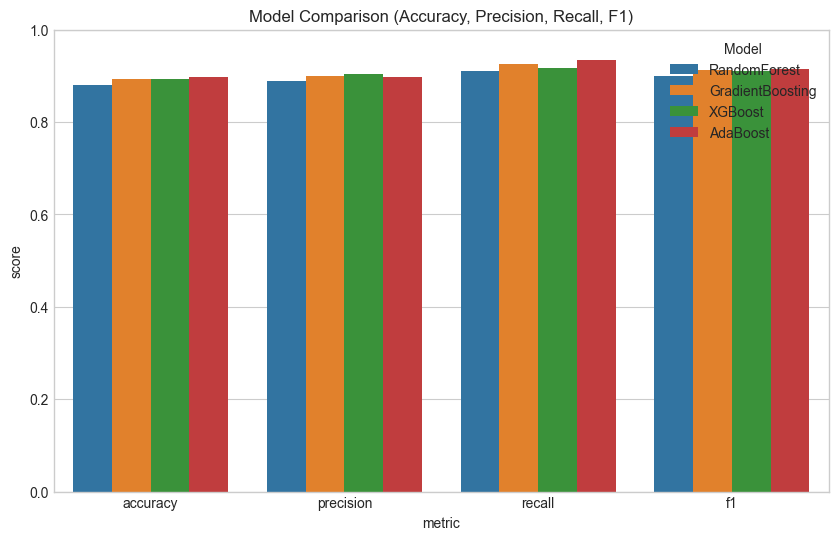

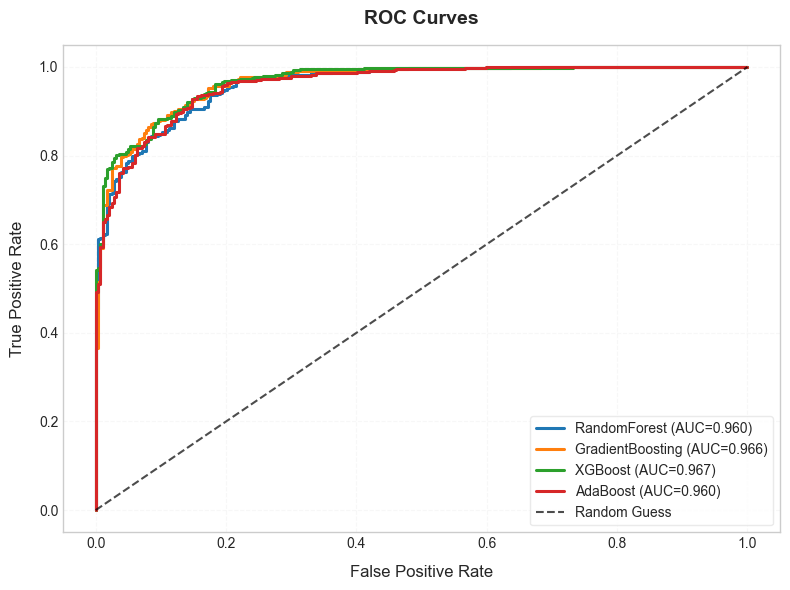

In [31]:
# Evaluate and collect results
results = []
results.append(evaluate_model(rf_model, X_val_scaled, y_val, "RandomForest"))
results.append(evaluate_model(gb_model, X_val_scaled, y_val, "GradientBoosting"))
results.append(evaluate_model(xgb_model, X_val_scaled, y_val, "XGBoost"))
results.append(evaluate_model(ada_model, X_val_scaled, y_val, "AdaBoost"))

# Compare models visually
compare_models(results)

models_dict = {
    "RandomForest": rf_model,
    "GradientBoosting": gb_model,
    "XGBoost": xgb_model,
    "AdaBoost": ada_model
}
# ROC curves
plot_roc_curves(models_dict, X_val_scaled, y_val, theme="light")


## Save

In [34]:
import os
import json
import joblib

def save_dict_as_json(data_dict, filename, results_path="results/"):
    """
    Save a dictionary as a JSON file.

    Parameters:
        data_dict (dict): Dictionary to save
        filename (str): Name of JSON file (e.g., "results.json")
        results_path (str): Path where to save. Defaults to "results/"
    """
    os.makedirs(results_path, exist_ok=True)
    file_path = os.path.join(results_path, filename)
    with open(file_path, "w") as f:
        json.dump(data_dict, f, indent=4)
    print(f"✅ JSON saved to {file_path}")


def save_models(models_dict, results_path="results/models/"):
    """
    Save trained sklearn models to disk using joblib.

    Parameters:
        models_dict (dict): Dictionary {model_name: trained_model}
        results_path (str): Path where to save. Defaults to "results/"
    """
    os.makedirs(results_path, exist_ok=True)
    for name, model in models_dict.items():
        file_path = os.path.join(results_path, f"{name}.joblib")
        joblib.dump(model, file_path)
        print(f"✅ Model '{name}' saved to {file_path}")


In [36]:
# Save dictionaries as JSON
save_dict_as_json(results, "results.json", results_path="results/")

# Save trained models themselves
save_models(models_dict, results_path="results/models/")


✅ JSON saved to results/results.json
✅ Model 'RandomForest' saved to results/models/RandomForest.joblib
✅ Model 'GradientBoosting' saved to results/models/GradientBoosting.joblib
✅ Model 'XGBoost' saved to results/models/XGBoost.joblib
✅ Model 'AdaBoost' saved to results/models/AdaBoost.joblib
